This work I made for a post on Medium: https://medium.com/@h.peixoto.m/the-ultimate-guide-for-time-series-4de79eb5d393 :)

# Importing 

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.2.0


In [2]:
#Importing dataset
train = pd.read_csv('../input/train_1.csv.zip').fillna(0)
train.head()
page = train['Page']


In [3]:
#Dropping Page Column
train = train.drop('Page',axis = 1)


# Creating the model

In [4]:

row = train.iloc[90000,:].values
X = row[0:549]
y = row[1:550]

# Splitting the dataset into the Training set and Test set without shuffle the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

For this model I'll create 2 LSTM layers and 3 Neural Nets layers, being the last Neural Net with only 1 neuron because is the one outcome the final value that will be predicted.

For optimizer I went with Adam and for metrics I will be using mean square erro, that is highly recommended for time series analysis.

In [5]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),

  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=["mae"])
history = model.fit(X_train, y_train, epochs = 200, verbose=0
                   )


In [6]:
#Taking off dimentions that were expanding for to be model.
y_pred  = model.predict(X_test)
y_pred2 = np.reshape(y_pred,(110,)) 

As you can see we got a pretty Ok model with a very simple code and no feature engineering, just following the recomendations from the post. :)

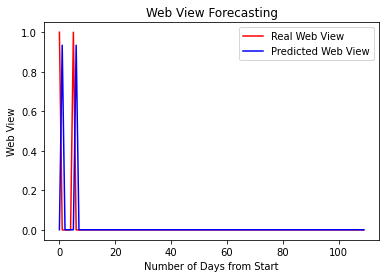

In [7]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred2, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

Now, we check how was our learning rate:

<Figure size 432x288 with 0 Axes>

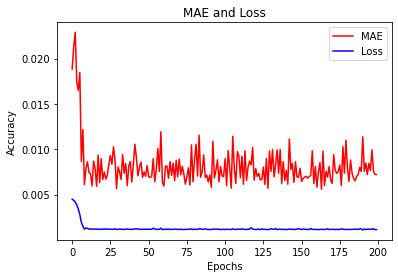

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()



You can see bellow that after 20 epocs my model did no improved that much, so after checking this graph would be recommended to change the max epocs to 25 instead of 200. 

So now let's try this:

In [9]:
#Now we will startwith tf.keras.backend.clear_session() to make sure that the last model will not influence this one.
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),

  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=["mae"])
history = model.fit(X_train, y_train, epochs = 25, verbose=0
                   )


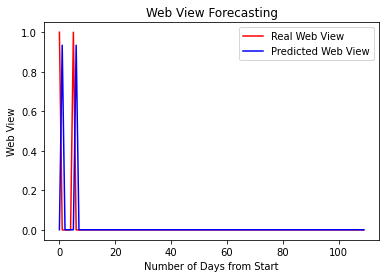

In [10]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred2, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

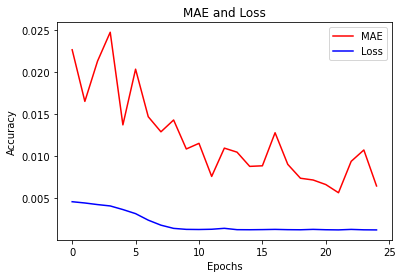

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()



Now with only 25 Epochs we had a result pretty close from the one with 200, so this prove that sometimes bigger it's not better.

For having even better results with this data would be recommended to normalize the data and do feature engineering, because your model is just as good as your data, but for this exemple my goal was only show how you can have some pretty good results with a simple data. 

For my lastest posts stay tuned on the medium page https://medium.com/@h.peixoto.m